In [40]:
from pathlib import Path
import pandas as pd
import numpy as np

In [41]:
processed = Path('../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [42]:
selection_data = selection_data[selection_data.year >= 2000]

In [43]:
selection_data[['spot', 'home']].value_counts()

spot  home
1.0   1.0     2551
      0.0     2206
3.0   1.0      728
2.0   1.0      661
      0.0      601
3.0   0.0      430
4.0   1.0      104
      0.0       72
5.0   1.0       17
      0.0       10
6.0   0.0        1
dtype: int64

In [44]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

In [45]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.0%


In [46]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [47]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

29

In [48]:
year_results = selection_data.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.782123,17
2001.0,0.761111,21
2002.0,0.772222,15
2003.0,0.761111,29
2004.0,0.786111,20
2005.0,0.778082,16
2006.0,0.719444,18
2007.0,0.732044,16
2008.0,0.803279,16


In [49]:
selection_data['EstProb'].describe()

count    7381.000000
mean        0.783583
std         0.021426
min         0.669749
25%         0.768481
50%         0.782530
75%         0.797296
max         0.858880
Name: EstProb, dtype: float64

<AxesSubplot:xlabel='EstProb', ylabel='Win'>

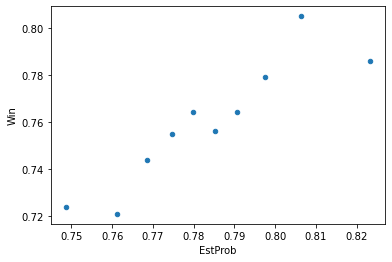

In [50]:
selection_data['bin'] = pd.qcut(selection_data['EstProb'], 10)

dots = selection_data.groupby(['bin'])[['EstProb', 'Win']].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('EstProb','Win')

In [51]:
# Relief pitchers data

# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season

# Relief pitchers data

# Game Scores/ELOs

# Team ratings

# Better Pitcher overall ratings

# Merge in 538 ELO ratings


# Set up S3 if necessary for size, or for GPUs

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Ensemble methods for NN and logistic

# Rest days

# Adjust Pitcher and Batter stats for park record ( merge it in and divide) - compare adjusted at home and away stats

# New pitcher flag?

# Find out where they are in the rotation

# Fix training so that it doesn't need to specify number of variables

# Split up grid search vs. non-grid search training

# optimal skip strategy

# Why is Win missing? Check merge loss

# Time-series CV

# Come up with potential guesses remaining counter (get schedule?)

In [52]:
restricted = selection_data.loc[
    (selection_data['park_factor'] >= 1) &
    (selection_data['spot'] <= 4),
    ['Win', 'year']
]

In [53]:
restricted= restricted.astype({'Win':'int8'})
restricted = streak_counter(restricted)
streaks = restricted.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

22

In [54]:
Wins = restricted.loc[
    (restricted['Win'] == True),
    'Win'].count()
Loses = restricted.loc[
    (restricted['Win'] == False),
    'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.8%


In [55]:
year_results = restricted.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.771242,12
2001.0,0.761246,21
2002.0,0.814815,22
2003.0,0.758242,22
2004.0,0.799257,18
2005.0,0.804878,16
2006.0,0.719697,18
2007.0,0.726619,13
2008.0,0.795082,17


In [17]:
selection_data = selection_data.sort_values(['year', 'Date'])

In [18]:
selection_data['pick_day'] = selection_data.groupby(['year']).cumcount() + 1
selection_data['pick_day'] = np.ceil(selection_data['pick_day'] / 2)

In [19]:
print(selection_data['pick_day'].value_counts().sort_index().to_string())

1.0      42
2.0      42
3.0      42
4.0      42
5.0      42
6.0      42
7.0      42
8.0      42
9.0      42
10.0     42
11.0     42
12.0     42
13.0     42
14.0     42
15.0     42
16.0     42
17.0     42
18.0     42
19.0     42
20.0     42
21.0     42
22.0     42
23.0     42
24.0     42
25.0     42
26.0     42
27.0     42
28.0     42
29.0     42
30.0     42
31.0     42
32.0     42
33.0     42
34.0     42
35.0     42
36.0     42
37.0     42
38.0     42
39.0     42
40.0     42
41.0     42
42.0     42
43.0     42
44.0     42
45.0     42
46.0     42
47.0     42
48.0     42
49.0     42
50.0     42
51.0     42
52.0     42
53.0     42
54.0     42
55.0     42
56.0     42
57.0     42
58.0     42
59.0     42
60.0     42
61.0     42
62.0     42
63.0     42
64.0     42
65.0     42
66.0     42
67.0     42
68.0     40
69.0     40
70.0     40
71.0     40
72.0     40
73.0     40
74.0     40
75.0     40
76.0     40
77.0     40
78.0     40
79.0     40
80.0     40
81.0     40
82.0     40
83.0     40
84.0